---
# 01. Normal equation
---

In [4]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [5]:
# 모든 샘플에 x0 = 1을 추가합니다.
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.9272318 ],
       [3.10710206]])

In [8]:
X_new = np.array([[0], [2]])
# 모든 샘플에 x0 = 1을 추가합니다.
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9272318 ],
       [10.14143591]])

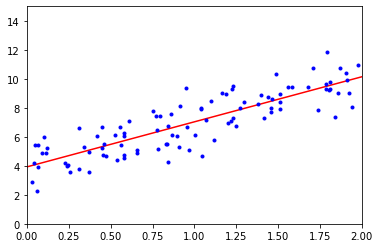

In [13]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

---
# 02. Linear Regression
---

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9272318]), array([[3.10710206]]))

In [15]:
lin_reg.predict(X_new)

array([[ 3.9272318 ],
       [10.14143591]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9272318 ],
       [3.10710206]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.9272318 ],
       [3.10710206]])